<a href="https://colab.research.google.com/github/REBEISamy/Intro-to-IA-projects/blob/main/Titatnic_with_tree_decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [375]:
# importing required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [376]:
df = pd.read_csv("/content/titanic-passengers (1).csv",sep = ";")
print(df)

     PassengerId Survived  Pclass  ...     Fare  Cabin  Embarked
0            343       No       2  ...  13.0000    NaN         S
1             76       No       3  ...   7.6500  F G73         S
2            641       No       3  ...   7.8542    NaN         S
3            568       No       3  ...  21.0750    NaN         S
4            672       No       1  ...  52.0000    B71         S
..           ...      ...     ...  ...      ...    ...       ...
886           10      Yes       2  ...  30.0708    NaN         C
887           61       No       3  ...   7.2292    NaN         C
888          535       No       3  ...   8.6625    NaN         S
889          102       No       3  ...   7.8958    NaN         S
890          428      Yes       2  ...  26.0000    NaN         S

[891 rows x 12 columns]


In [377]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


### Les valeurs manquante

In [378]:
df.isnull

<bound method DataFrame.isnull of      PassengerId Survived  Pclass  ...     Fare  Cabin  Embarked
0            343       No       2  ...  13.0000    NaN         S
1             76       No       3  ...   7.6500  F G73         S
2            641       No       3  ...   7.8542    NaN         S
3            568       No       3  ...  21.0750    NaN         S
4            672       No       1  ...  52.0000    B71         S
..           ...      ...     ...  ...      ...    ...       ...
886           10      Yes       2  ...  30.0708    NaN         C
887           61       No       3  ...   7.2292    NaN         C
888          535       No       3  ...   8.6625    NaN         S
889          102       No       3  ...   7.8958    NaN         S
890          428      Yes       2  ...  26.0000    NaN         S

[891 rows x 12 columns]>

In [379]:
pd.isnull(df).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Remplacement des valeurs manquante

In [380]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [381]:
print(df["Cabin"].value_counts())

B96 B98        4
G6             4
C23 C25 C27    4
E101           3
F33            3
              ..
E58            1
C45            1
D10 D12        1
B4             1
B73            1
Name: Cabin, Length: 147, dtype: int64


In [382]:
df["Cabin"].fillna('G6',inplace=True)

In [383]:
print(df["Embarked"].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [384]:
df["Embarked"].fillna('S',inplace=True)

### Categorical to Numerical

In [385]:
df['Survived']= df['Survived'].map({'Yes':1,'No':0})

In [386]:
pd.isnull(df).sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [387]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  ...     Fare  Cabin  Embarked
0            343         0       2  ...  13.0000     G6         S
1             76         0       3  ...   7.6500  F G73         S
2            641         0       3  ...   7.8542     G6         S
3            568         0       3  ...  21.0750     G6         S
4            672         0       1  ...  52.0000    B71         S
..           ...       ...     ...  ...      ...    ...       ...
886           10         1       2  ...  30.0708     G6         C
887           61         0       3  ...   7.2292     G6         C
888          535         0       3  ...   8.6625     G6         S
889          102         0       3  ...   7.8958     G6         S
890          428         1       2  ...  26.0000     G6         S

[891 rows x 12 columns]>

###Eliminate the columns that do not interest us

In [388]:
df.drop(["Name","Cabin","Embarked","PassengerId","Ticket","Pclass","SibSp","Parch","Fare"],axis = 'columns',inplace =True)

In [389]:
from sklearn.preprocessing import LabelEncoder

# encode variables into numeric labels
le = LabelEncoder()

columns = ['Sex', 'Survived']

for col in columns:
    le.fit(df[col])
    df[col] = le.transform(df[col])
    
df.head()

,Survived,Sex,Age
0,0,1,28.0
1,0,1,25.0
2,0,1,20.0
3,0,0,29.0
4,0,1,31.0


In [390]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

###Let's start applying the decision tree

In [391]:
#training set and Testing set Apply decision tree

Features = df.drop(columns=['Survived'],axis=1)
y = df['Survived']

train_x,test_x,train_y,test_y = train_test_split(Features,y, test_size= 0.2, random_state = None)
model = DecisionTreeClassifier()
# fit the model with the training data
model.fit(train_x,train_y)
# depth of the decision tree
print('Depth of the Decision Tree :', model.get_depth())

Depth of the Decision Tree : 18


In [392]:
# predict the target on the train dataset
predict_train = model.predict(test_x)
print("score:{}".format(accuracy_score(test_y, predict_train)*100,2))
print('Target on train data',predict_train)

score:75.97765363128491
Target on train data [0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 1
 0 1 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0
 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0
 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1]


In [393]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, predict_train))
print('Mean Squared Error:', metrics.mean_squared_error(test_y, predict_train))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, predict_train)))

Mean Absolute Error: 0.24022346368715083
Mean Squared Error: 0.24022346368715083
Root Mean Squared Error: 0.4901259671626783


####Decision tree Visualization

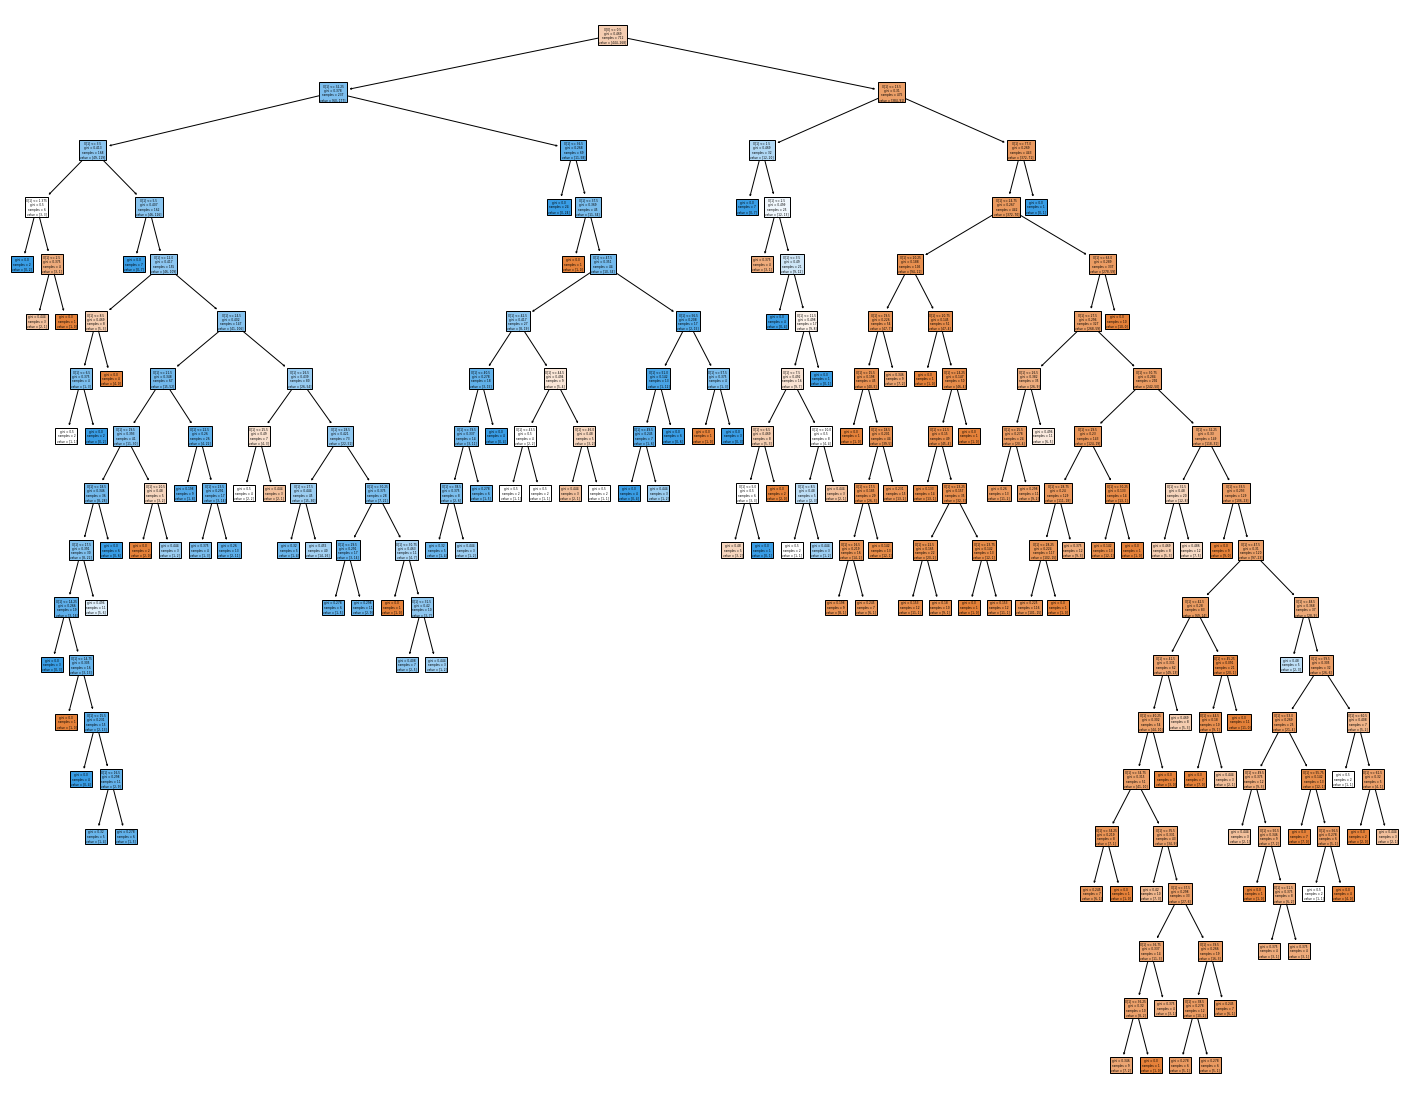

In [394]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model.fit(train_x,train_y),filled=True)

###Changing Parametre

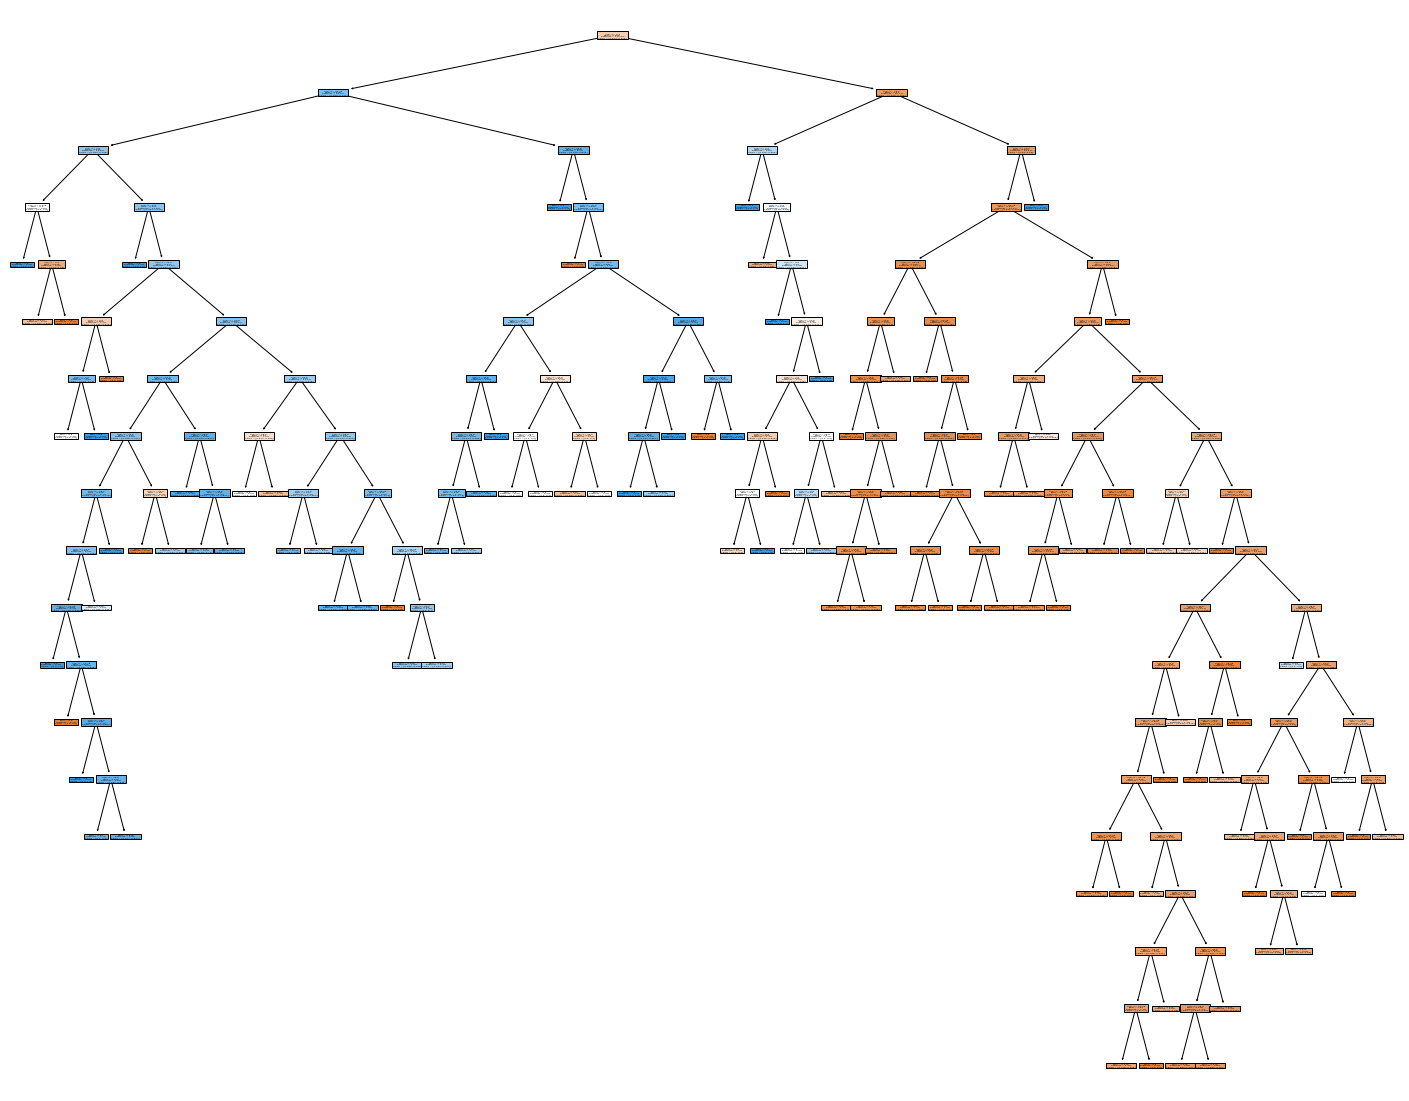

In [395]:
fig2 = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model.fit(train_x,train_y),filled=True,impurity =True,proportion=True)

###Calculate the new accuracy and compare it with the previous results.

In [396]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

print('The accuracy of the Decision Tree Classifier is',round(accuracy_score(predict_train,test_y)*100,2))

#I used the cross_validation score

kfold = KFold(n_splits=10, random_state=22,shuffle = True) # k=10, split the data into 10 equal parts
result_rm=cross_val_score(model,Features,y,cv=10,scoring='accuracy')
print('The cross validated score for Decision Tree is:',round(result_rm.mean()*100,2))
y_pred = cross_val_predict(model,Features,y,cv=10)

The accuracy of the Decision Tree Classifier is 75.98
The cross validated score for Decision Tree is: 75.99


In this part of my project i show different ways to split the data and evaluations it.

It can be seen that there is a small optimisation

Accuracy = 73.18

Cross validation score = 77.78

###Use random forest then change the number of estimators

In [397]:
# Random Forests n_estimators=1500

model = RandomForestClassifier(criterion='gini', n_estimators=1500,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)

In [398]:
print('            The Accuracy of the model                 ')

print('The accuracy of the Random Forest Classifier is',round(accuracy_score(predict_train,test_y)*100,2))


            The Accuracy of the model                 
The accuracy of the Random Forest Classifier is 75.98


Each time we use different n_estimators we get the same accuracy :

In [399]:
# Random Forests n_estimators=200


model = RandomForestClassifier(criterion='gini', n_estimators=200,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)
print('The accuracy of the Random Forest Classifier is',round(accuracy_score(predict_train,test_y)*100,2))


The accuracy of the Random Forest Classifier is 75.98


In [400]:
# Random Forests n_estimators=5000


model = RandomForestClassifier(criterion='gini', n_estimators=5000,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)
print('The accuracy of the Random Forest Classifier is',round(accuracy_score(predict_train,test_y)*100,2))


The accuracy of the Random Forest Classifier is 75.98
